### Sentiment Analysis
looking positive and negative tweets of each twitter user
calculation of sentiment scores is done by using <b></b> library


In [295]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [296]:
from tweet_cleaner import *
from get_usernames import get_usernames
usernames = get_usernames()

In [297]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_scores(tweets):

    scores = []

    for tweet in tweets:
        if (tweet is None) or (not isinstance(tweet, str)):
            continue
        
        if len(tweet) > 0:
            score = analyzer.polarity_scores(tweet)
            scores.append(score)
            
    return scores

In [298]:
get_sentiment_scores(["Enjoy your lovely time", "You are idiot", "You are awesome", "My day was good"])

[{'neg': 0.0, 'neu': 0.222, 'pos': 0.778, 'compound': 0.7906},
 {'neg': 0.623, 'neu': 0.377, 'pos': 0.0, 'compound': -0.5106},
 {'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'compound': 0.6249},
 {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}]

In [299]:
from load_data import *

In [300]:
scores = {}
compound_scores = {}

clean_tweets_dict = get_all_clean_tweets_dict()

for username,user_tweets in clean_tweets_dict.items():
    user_scores = get_sentiment_scores(user_tweets["Cleaned"])
    scores[username] = user_scores
    compound_scores[username] = list(map(lambda score: score["compound"], user_scores))

In [301]:
scores_df = pd.DataFrame.from_dict(scores, orient='index')
scores_df = scores_df.T
compound_scores_df = pd.DataFrame.from_dict(compound_scores, orient='index')
compound_scores_df = compound_scores_df.T

In [302]:
compound_scores_df.describe()

,BarackObama,katyperry,kanyewest,rihanna,arianagrande,jtimberlake,justinbieber,billgates,elonmusk,shakira,brunomars,wizkhalifa,harry_styles,Cristiano,neymarjr
count,998.000000,989.000000,757.000000,969.000000,901.000000,984.000000,908.000000,999.000000,962.000000,898.000000,988.000000,977.000000,975.000000,998.000000,989.000000
mean,0.454426,0.343191,0.157265,0.217633,0.284866,0.245352,0.259963,0.460007,0.271247,0.236129,0.212639,0.080712,0.336354,0.387505,0.219688
std,0.452396,0.429983,0.385322,0.396794,0.414755,0.360514,0.321654,0.434127,0.351902,0.370429,0.399569,0.361312,0.416101,0.381765,0.371441
min,-0.943200,-0.952600,-0.897900,-0.955200,-0.967000,-0.893400,-0.865800,-0.962800,-0.911800,-0.946800,-0.986800,-0.900100,-0.919900,-0.750600,-0.757900
25%,0.153100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.226300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.585900,0.381800,0.000000,0.000000,0.226300,0.000000,0.202300,0.599400,0.296000,0.000000,0.000000,0.000000,0.202300,0.421500,0.000000
75%,0.827100,0.726900,0.440400,0.557400,0.636900,0.561025,0.526700,0.802000,0.571900,0.571900,0.526700,0.361200,0.765000,0.729700,0.493900
max,0.976600,0.989900,0.978300,0.993200,0.998900,0.969800,0.962800,0.970200,0.969400,0.992400,0.999700,0.931300,0.978600,0.994000,0.997100


In [303]:
compound_scores_description = compound_scores_df.describe()
compound_scores_mean = compound_scores_description.loc["mean"]
print(compound_scores_df.describe())

       BarackObama   katyperry   kanyewest     rihanna  arianagrande  \
count   998.000000  989.000000  757.000000  969.000000    901.000000   
mean      0.454426    0.343191    0.157265    0.217633      0.284866   
std       0.452396    0.429983    0.385322    0.396794      0.414755   
min      -0.943200   -0.952600   -0.897900   -0.955200     -0.967000   
25%       0.153100    0.000000    0.000000    0.000000      0.000000   
50%       0.585900    0.381800    0.000000    0.000000      0.226300   
75%       0.827100    0.726900    0.440400    0.557400      0.636900   
max       0.976600    0.989900    0.978300    0.993200      0.998900   

       jtimberlake  justinbieber   billgates    elonmusk     shakira  \
count   984.000000    908.000000  999.000000  962.000000  898.000000   
mean      0.245352      0.259963    0.460007    0.271247    0.236129   
std       0.360514      0.321654    0.434127    0.351902    0.370429   
min      -0.893400     -0.865800   -0.962800   -0.911800   -0.9

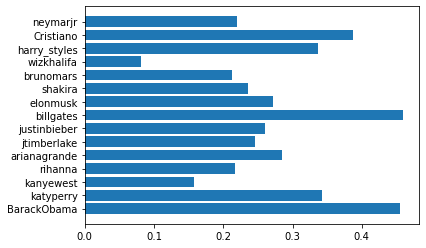

In [304]:
import matplotlib.pyplot as plt

plt.barh(usernames, compound_scores_mean)
plt.show()

In [305]:
from collections import Counter
import numpy as np
from tweet_cleaner import *

def mostFrequentWordOf(tweets, top_count = 10):
    if (tweets is None):
        return
    all_words = []
    for tweet in tweets:
        if (tweet is None) or (not isinstance(tweet, str)):
            continue
        tweet = removePunctuation(tweet)
        for words in tweet.split():
            all_words.append(words)
    return Counter(all_words).most_common(top_count)

In [306]:
frequent_words_username = {}
total_tweets = []

for username,user_tweets in clean_tweets_dict.items():
    df  = user_tweets["Cleaned"]
    user_ts = df.to_numpy()
    total_tweets.extend(user_ts)
    
    freq_words = mostFrequentWordOf(user_ts)
    frequent_words_username[username] = freq_words
      
overall_frequent_word = mostFrequentWordOf(total_tweets)

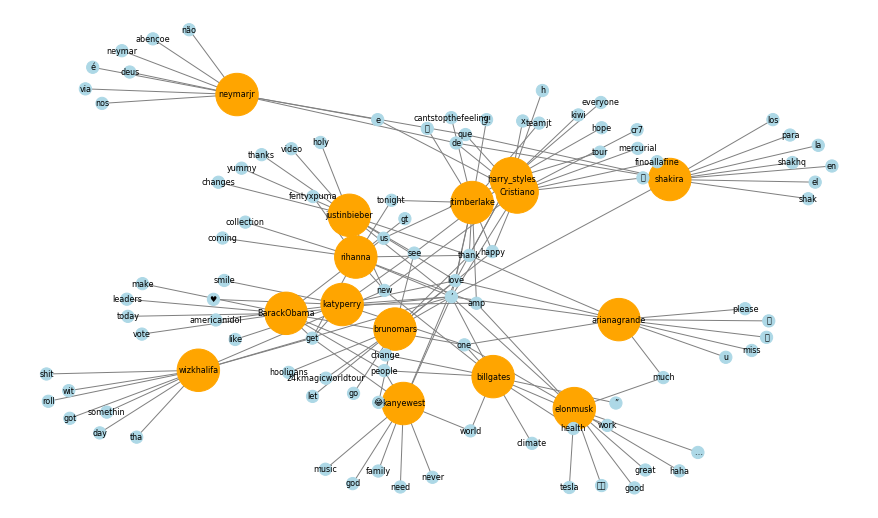

In [313]:
import networkx as nx

users = frequent_words_username.keys()
G = nx.Graph()
G.add_nodes_from(users)

color_map = []
size_map = []

for i in range(len(users)):
    color_map.append("orange")
    size_map.append(1800)

for username, counts in frequent_words_username.items():
     for word_count in counts:
        G.add_edge(username, word_count[0])

for i in range(len(G.nodes()) - len(users)):
    color_map.append("lightblue")
    size_map.append(150)
    
plt.figure(3,figsize=(12,7))
nx.draw(G, node_color = color_map, node_size=size_map, with_labels=True, font_size=8, edge_color='grey')
plt.show()

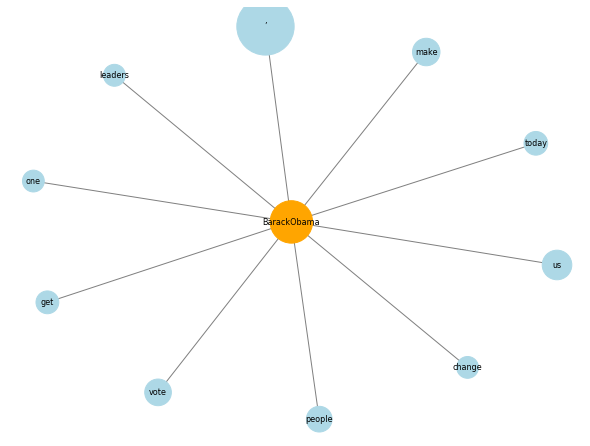

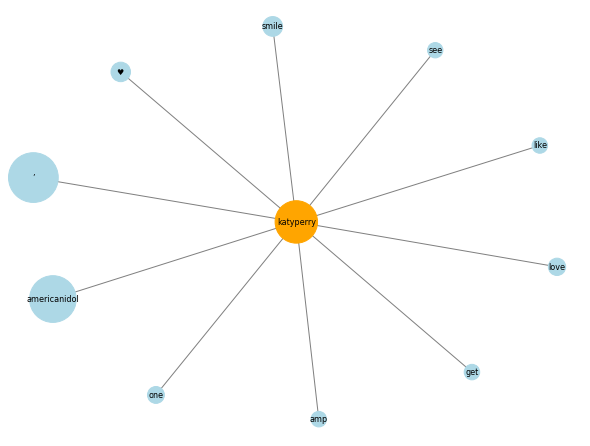

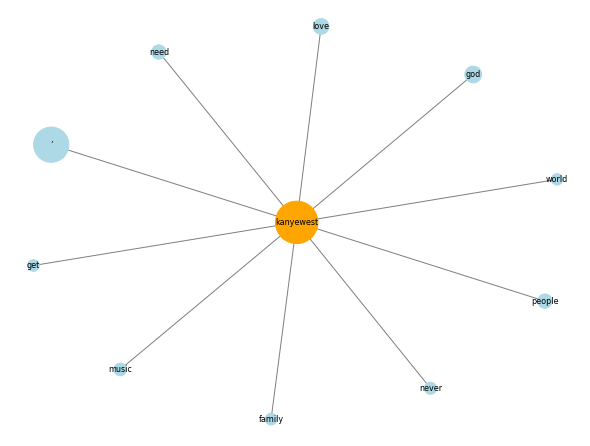

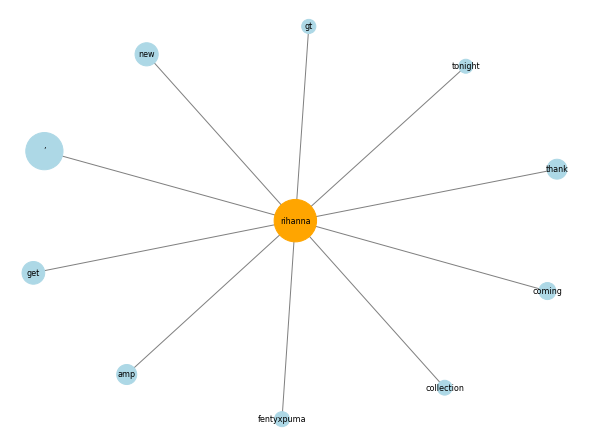

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 129293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128420 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 129293 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128420 missing from current font.
  font.set_text(s, 0, flags=flags)


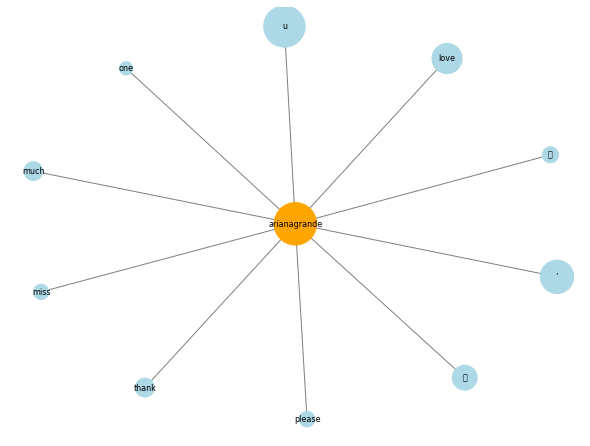

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128588 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128591 missing from current font.
  font.set_text(s, 0, flags=flags)


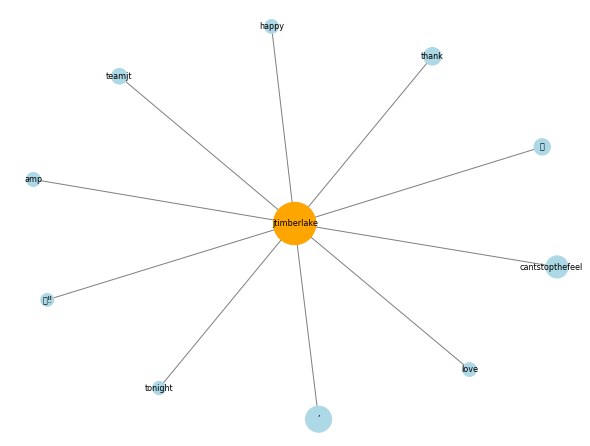

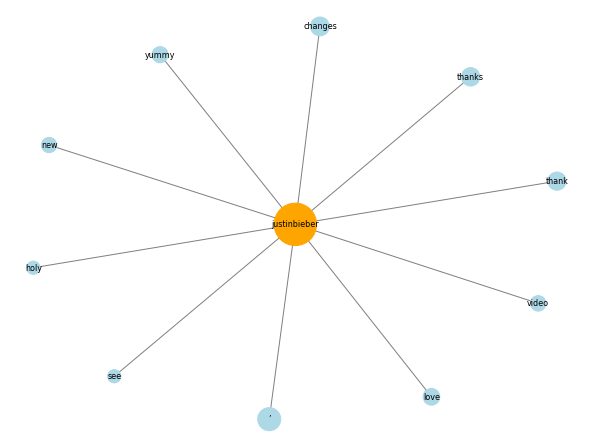

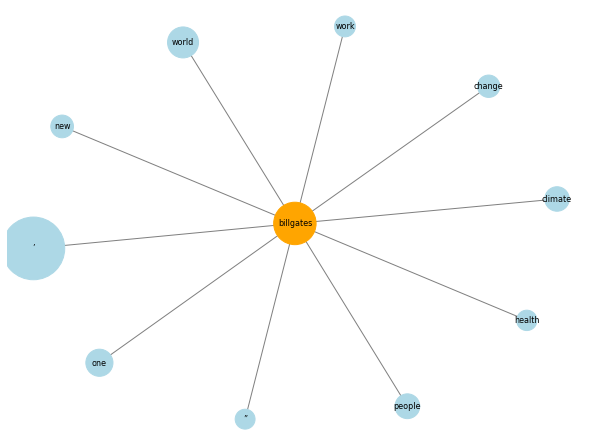

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0, flags=flags)


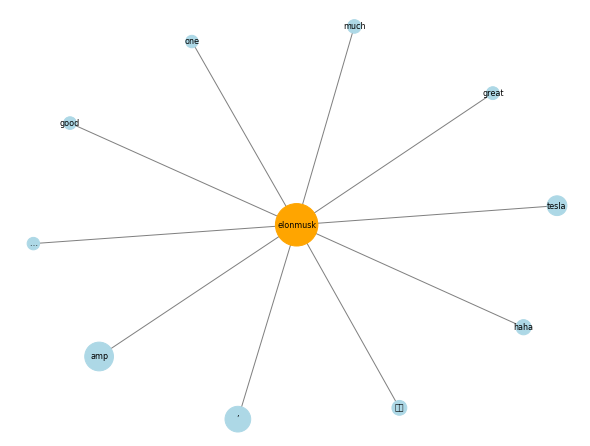

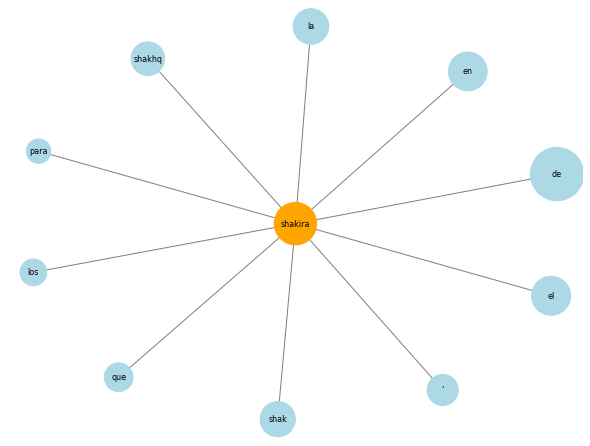

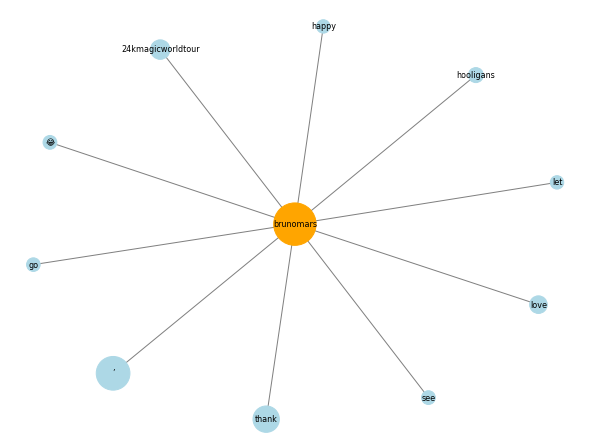

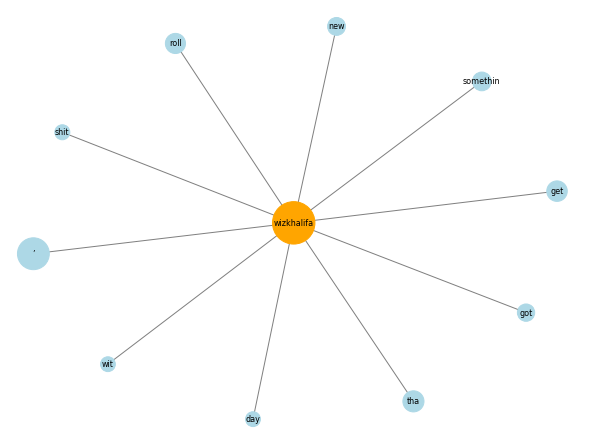

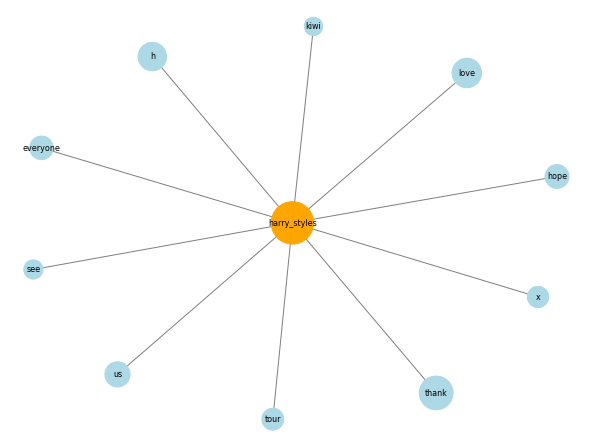

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128076 missing from current font.
  font.set_text(s, 0, flags=flags)


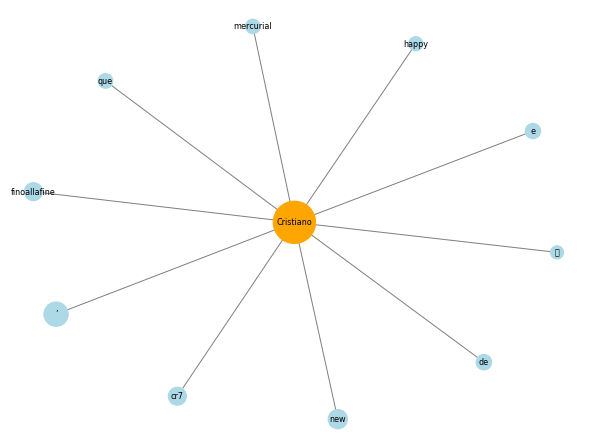

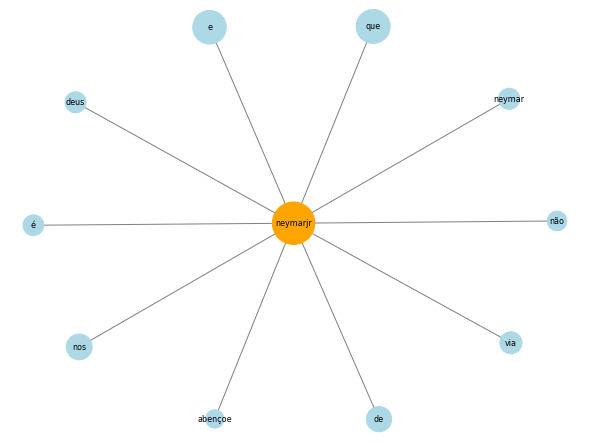

In [308]:
import networkx as nx

for username, counts in frequent_words_username.items():
    Guser = nx.Graph()
    Guser.add_nodes_from([username])

    color_map = []
    size_map = []

    color_map.append("orange")
    size_map.append(1800)

    for word_count in counts:
        Guser.add_edge(username, word_count[0])
        color_map.append("lightblue")
        size_map.append(5 * word_count[1])


    # Plot the graph
    plt.figure(3,figsize=(8,6))
    nx.draw(Guser, node_color = color_map, node_size=size_map, with_labels=True, font_size=8, edge_color='grey')
    plt.show()

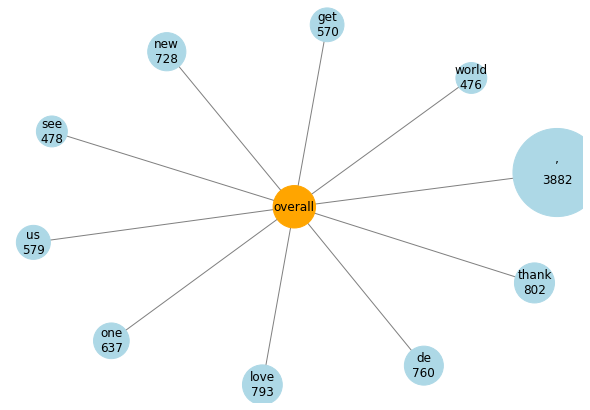

In [309]:
import networkx as nx


G1 = nx.Graph()
G1.add_nodes_from(["overall"])

color_map = []
size_map = []

color_map.append("orange")
size_map.append(1800)

for word_count in overall_frequent_word:
    G1.add_edge("overall", str(word_count[0]) + "\n" + str(word_count[1]))
    
    color_map.append("lightblue")
    size_map.append(2 * word_count[1])



# Plot the graph
plt.figure(3,figsize=(8,5.5))
nx.draw(G1, node_color = color_map, node_size=size_map, with_labels=True, font_size=12, edge_color='grey')
plt.show()